In [1]:
import sys
print(sys.executable)

C:\Users\mepri\SentimentAnalysis_Airlines\venv\Scripts\python.exe


In [60]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords


In [61]:
columns =  ['text' ,'sentiment']

df = pd.read_csv("data/amazon_cells_labelled.txt" , sep='\\t', engine = 'python', names  = columns)

In [62]:
df['text_length'] = df['text'].astype(str).str.len().fillna(0)
df['word_count'] = df['text'].astype(str).apply(lambda s: len(str(s).split()))

In [63]:
df['exclamations'] = df.text.apply(lambda x: x.count('!'))
df['capital_letters'] = df.text.apply(lambda x: sum(1 for c in x if c.isupper()))

In [ ]:
from wordcloud import WordCloud
import plotly.express as px
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Load data

# 1. DATASET OVERVIEW
print("="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Total samples: {len(df)}")
print(f"\nShape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nData types:\n{df.dtypes}")

# 2. TEXT STATISTICS
print("\n" + "="*50)
print("TEXT STATISTICS")
print("="*50)
print(df[['text_length', 'word_count']].describe())

# Visualize text length distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df['text_length'], bins=50, edgecolor='black')
axes[0].set_title('Distribution of Text Length (characters)')
axes[0].set_xlabel('Character Count')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['word_count'], bins=50, edgecolor='black', color='coral')
axes[1].set_title('Distribution of Word Count')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../images/text_length_distribution.png')
plt.show()

# 3. EMOTION DISTRIBUTION (TARGET VARIABLE ANALYSIS)
print("\n" + "="*50)
print("EMOTION DISTRIBUTION")
print("="*50)

emotion_counts = train_df['primary_emotion_name'].value_counts()
print(emotion_counts)

# Visualize emotion distribution
plt.figure(figsize=(14, 6))
emotion_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Emotions in Training Data', fontsize=16)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../notebooks/emotion_distribution.png')
plt.show()

# Check for class imbalance
print(f"\nClass imbalance ratio (max/min): {emotion_counts.max() / emotion_counts.min():.2f}")

# 4. WORD FREQUENCY ANALYSIS
print("\n" + "="*50)
print("WORD FREQUENCY ANALYSIS")
print("="*50)

# Get all words
all_text = ' '.join(train_df['text'].astype(str))
words = all_text.lower().split()

# Remove stopwords
stop_words = set(stopwords.words('english'))
words_filtered = [word for word in words if word not in stop_words and len(word) > 2]

# Most common words
word_freq = Counter(words_filtered)
print("\nTop 20 most common words:")
for word, count in word_freq.most_common(20):
    print(f"{word}: {count}")

# 5. WORD CLOUDS BY EMOTION
print("\n" + "="*50)
print("GENERATING WORD CLOUDS")
print("="*50)

# Select top 6 emotions for word clouds
top_emotions = emotion_counts.head(6).index

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, emotion in enumerate(top_emotions):
    emotion_text = ' '.join(train_df[train_df['primary_emotion_name'] == emotion]['text'].astype(str))
    
    wordcloud = WordCloud(width=400, height=300, 
                         background_color='white',
                         stopwords=stop_words,
                         max_words=50).generate(emotion_text)
    
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].set_title(f'{emotion.upper()}', fontsize=14, fontweight='bold')
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('../notebooks/emotion_wordclouds.png')
plt.show()

# 6. TEXT LENGTH BY EMOTION
print("\n" + "="*50)
print("TEXT LENGTH BY EMOTION")
print("="*50)

plt.figure(figsize=(14, 6))
train_df.boxplot(column='text_length', by='primary_emotion_name', figsize=(14, 6))
plt.xticks(rotation=45, ha='right')
plt.title('Text Length Distribution by Emotion')
plt.suptitle('')
plt.ylabel('Character Count')
plt.tight_layout()
plt.savefig('../notebooks/text_length_by_emotion.png')
plt.show()

# 7. CORRELATION ANALYSIS
print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Numeric features correlation
numeric_features = ['text_length', 'word_count', 'primary_emotion']
correlation_matrix = train_df[numeric_features].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('../notebooks/correlation_matrix.png')
plt.show()

# 8. SAMPLE TEXTS BY EMOTION
print("\n" + "="*50)
print("SAMPLE TEXTS BY EMOTION")
print("="*50)

for emotion in top_emotions[:3]:
    print(f"\n{emotion.upper()}:")
    samples = train_df[train_df['primary_emotion_name'] == emotion]['text'].head(3).tolist()
    for i, sample in enumerate(samples, 1):
        print(f"  {i}. {sample}")

print("\n" + "="*50)
print("EDA COMPLETE")
print("="*50)

In [64]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mepri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
df.head()

,text,sentiment,text_length,word_count,exclamations,capital_letters
0,So there is no way for me to plug it in here i...,0,82,21,0,4
1,"Good case, Excellent value.",1,27,4,0,2
2,Great for the jawbone.,1,22,4,0,1
3,Tied to charger for conversations lasting more...,0,79,11,2,14
4,The mic is great.,1,17,4,0,1


In [66]:
df.shape

(1000, 6)

In [67]:
df.dtypes

text               object
sentiment           int64
text_length         int64
word_count          int64
exclamations        int64
capital_letters     int64
dtype: object

In [68]:
df.isnull().sum()


text               0
sentiment          0
text_length        0
word_count         0
exclamations       0
capital_letters    0
dtype: int64

In [69]:
stopwords = stopwords.words('english')


In [48]:
def _clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\.\S+', '', text)   # remove urls
    text = re.sub(r'@\w+|#\w+', '', text)          # remove mentions/hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()       # normalize whitespace
    text = ' '.join([word for word in text.split() if word not in stopwords])

    return text

df['clean_text'] = df['text'].apply(_clean_text)

In [49]:
df

,Id,airline_sentiment,airline,text,retweet_count,user_timezone,clean_text,exclamations,three_dots,capital_letters
0,1450,negative,American,@AmericanAir thanks for the response. I know i...,0,NaN,thanks response know fault im ord t5 hungry wa...,0,1,9
1,7983,positive,US Airways,@USAirways I'm enjoying my flights so far! You...,0,London,im enjoying flights far youre great job todays...,1,0,6
2,6479,positive,United,Hey @united you've upgraded me on a 10 hour In...,0,Amsterdam,hey youve upgraded 10 hour international fligh...,1,0,3
3,2478,negative,United,"@united ""where we trick you into making us loo...",1,NaN,trick making us look popular twitter worst air...,0,0,1
4,6366,positive,United,@united it was delivered! Thank you for making...,0,NaN,delivered thank making sure arrived doorstep,2,0,1
...,...,...,...,...,...,...,...,...,...,...
4003,8322,positive,American,@AmericanAir thanks.....,0,NaN,thanks,0,1,2
4004,466,negative,Southwest,@SouthwestAir thanks! I expected a wait... Jus...,0,Central Time (US & Canada),thanks expected wait long,1,1,4
4005,6265,positive,United,@united despite my bag not making it to Newark...,0,Eastern Time (US & Canada),despite bag making newark good informative ema...,1,0,1
4006,860,negative,US Airways,"@USAirways not likely, flightaware says plane ...",0,NaN,likely flightaware says plane still durango ha...,0,0,4


In [50]:
df['text_length'] = df['text'].astype(str).str.len().fillna(0)
df['word_count'] = df['text'].astype(str).apply(lambda s: len(str(s).split()))

df['avg_word_length'] = df['text_length']/df['word_count']



In [51]:
df.head()

,Id,airline_sentiment,airline,text,retweet_count,user_timezone,clean_text,exclamations,three_dots,capital_letters,text_length,word_count,avg_word_length
0,1450,negative,American,@AmericanAir thanks for the response. I know i...,0,NaN,thanks response know fault im ord t5 hungry wa...,0,1,9,126,26,4.846154
1,7983,positive,US Airways,@USAirways I'm enjoying my flights so far! You...,0,London,im enjoying flights far youre great job todays...,1,0,6,133,22,6.045455
2,6479,positive,United,Hey @united you've upgraded me on a 10 hour In...,0,Amsterdam,hey youve upgraded 10 hour international fligh...,1,0,3,94,17,5.529412
3,2478,negative,United,"@united ""where we trick you into making us loo...",1,NaN,trick making us look popular twitter worst air...,0,0,1,117,19,6.157895
4,6366,positive,United,@united it was delivered! Thank you for making...,0,NaN,delivered thank making sure arrived doorstep,2,0,1,78,14,5.571429


In [52]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)

In [53]:
categorical_columns

['airline_sentiment', 'airline', 'text', 'user_timezone', 'clean_text']

In [54]:
numerical_columns

['id',
 'retweet_count',
 'exclamations',
 'three_dots',
 'capital_letters',
 'text_length',
 'word_count',
 'avg_word_length']

In [57]:
numerical_columns = [
 'retweet_count',
 'exclamations',
 'three_dots',
 'capital_letters',
 'text_length',
 'word_count',
 'avg_word_length'
]

df.groupby("airline_sentiment")[numerical_columns].mean()



,retweet_count,exclamations,three_dots,capital_letters,text_length,word_count,avg_word_length
airline_sentiment,,,,,,,
negative,0.092950,0.284239,0.081724,5.675348,113.976650,19.665918,5.927872
positive,0.062325,0.833240,0.044357,6.140932,86.554183,14.061763,6.439399


In [68]:
df.groupby("airline_sentiment")[numerical_columns].describe().T

airline_sentiment         negative     positive
retweet_count   count  2227.000000  1781.000000
                mean      0.092950     0.062325
                std       0.583449     0.491548
                min       0.000000     0.000000
                25%       0.000000     0.000000
                50%       0.000000     0.000000
                75%       0.000000     0.000000
                max      22.000000    11.000000
exclamations    count  2227.000000  1781.000000
                mean      0.284239     0.833240
                std       0.758029     1.198190
                min       0.000000     0.000000
                25%       0.000000     0.000000
                50%       0.000000     1.000000
                75%       0.000000     1.000000
                max       9.000000    13.000000
three_dots      count  2227.000000  1781.000000
                mean      0.081724     0.044357
                std       0.307970     0.216582
                min       0.000000     0.000000
                25%       0.000000     0.000000
                50%       0.000000     0.000000
                75%       0.000000     0.000000
                max       4.000000     2.000000
capital_letters count  2227.000000  1781.000000
                mean      5.675348     6.140932
                std       4.709927     5.768357
                min       0.000000     0.000000
                25%       3.000000     3.000000
                50%       5.000000     5.000000
                75%       7.000000     8.000000
                max      77.000000    85.000000
text_length     count  2227.000000  1781.000000
                mean    113.976650    86.554183
                std      30.593903    39.477870
                min      12.000000    12.000000
                25%      96.000000    52.000000
                50%     125.000000    87.000000
                75%     138.000000   125.000000
                max     164.000000   156.000000
word_count      count  2227.000000  1781.000000
                mean     19.665918    14.061763
                std       5.954584     7.000690
                min       2.000000     2.000000
                25%      16.000000     8.000000
                50%      21.000000    14.000000
                75%      24.000000    20.000000
                max      32.000000    30.000000
avg_word_length count  2227.000000  1781.000000
                mean      5.927872     6.439399
                std       0.896047     1.262109
                min       4.266667     4.000000
                25%       5.360000     5.571429
                50%       5.782609     6.136364
                75%       6.333333     7.000000
                max      17.000000    14.000000

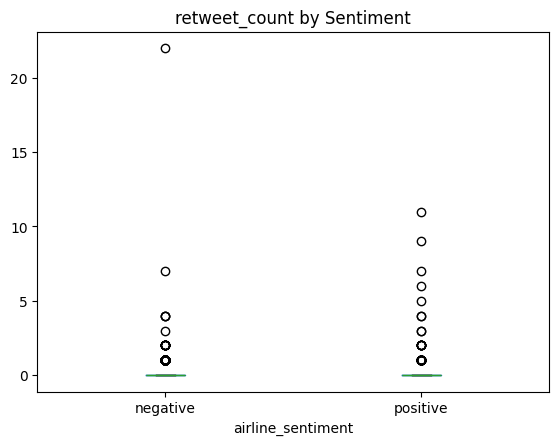

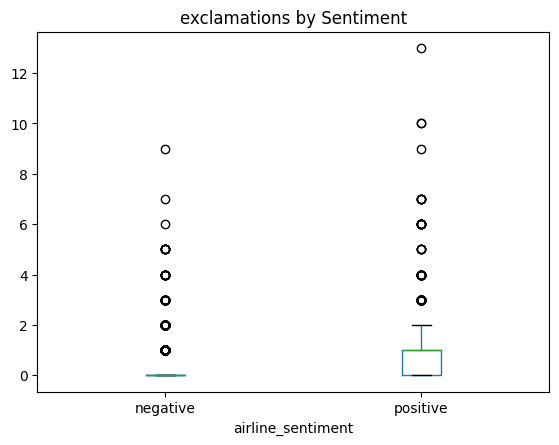

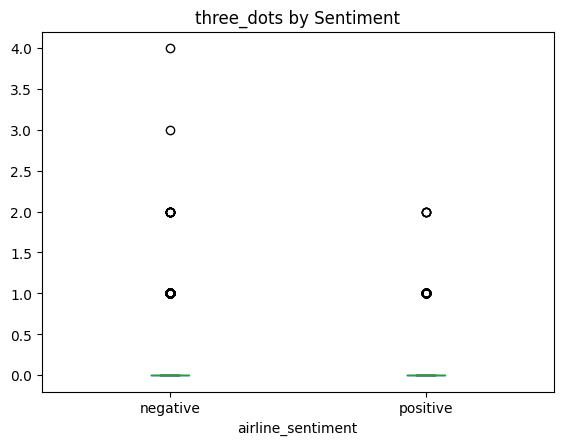

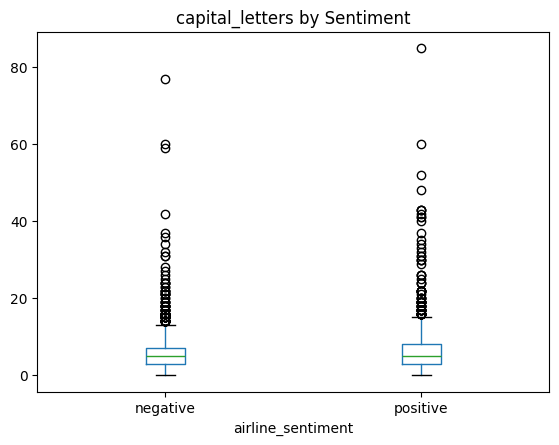

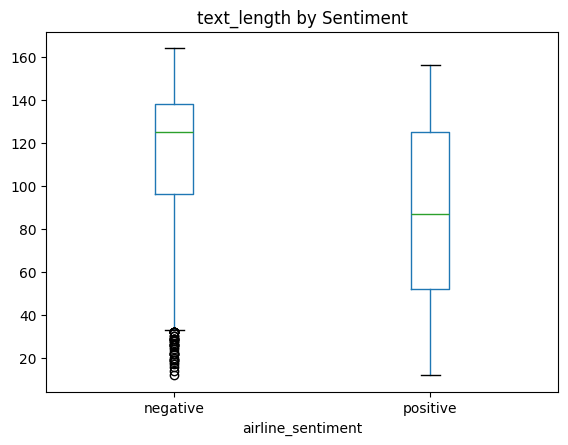

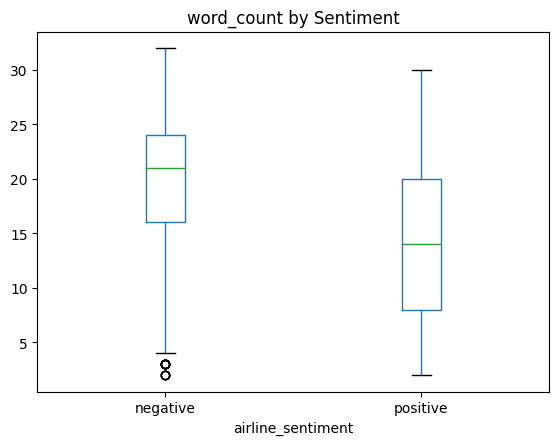

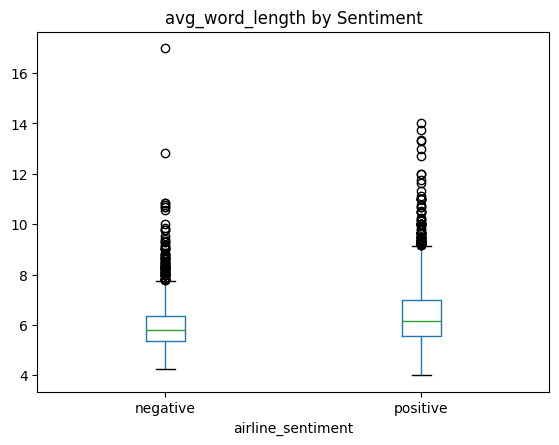

In [65]:
for n in numerical_columns:
    df.boxplot(
        column=n,
        by="airline_sentiment",
        grid=False
    )
    plt.title(n+" by Sentiment")
    plt.suptitle("")
    plt.show()

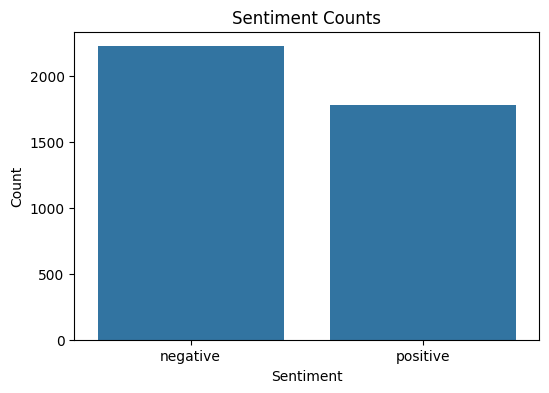

In [16]:
# Sentiment count
plt.figure(figsize=(6,4))
sns.countplot(x='airline_sentiment', data=df, order=['negative','positive'])
plt.title("Sentiment Counts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

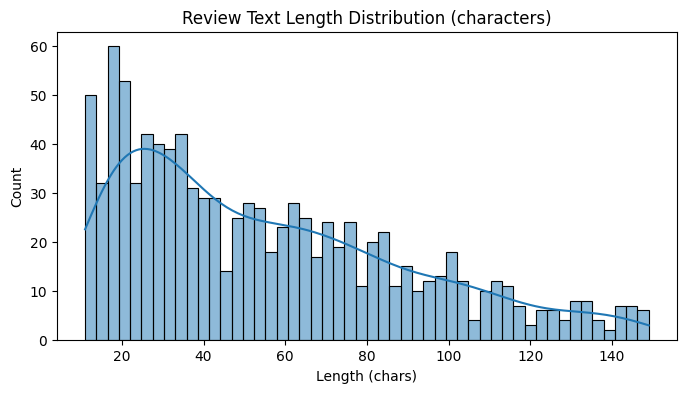

In [50]:
plt.figure(figsize=(8,4))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Review Text Length Distribution (characters)")
plt.xlabel("Length (chars)")
plt.show()

In [19]:
df.describe()

,Id,retweet_count,text_length,word_count
count,4008.000000,4008.000000,4008.000000,4008.000000
mean,4072.780689,0.079341,101.791168,17.175649
std,2970.005959,0.544677,37.389906,7.016049
min,1.000000,0.000000,12.000000,2.000000
25%,1360.750000,0.000000,74.000000,12.000000
50%,2708.500000,0.000000,112.000000,18.000000
75%,7117.500000,0.000000,136.000000,23.000000
max,8459.000000,22.000000,164.000000,32.000000


In [22]:
df[['retweet_count']].value_counts()

retweet_count
0                3791
1                 182
2                  20
4                   5
3                   3
7                   2
5                   1
6                   1
9                   1
11                  1
22                  1
Name: count, dtype: int64

In [69]:
df[['exclamations']].value_counts()

exclamations
0               2716
1                827
2                278
3                104
4                 46
6                 15
5                 11
7                  6
9                  2
10                 2
13                 1
Name: count, dtype: int64

## Retweet Count is mostly zero for most records, hence doesnt seem to add value to the dataset, hence we will drop this feature during training